# DSA210 Term Project: Health Spending, Well-Being and Out-of-Pocket Burden

## Motivation
In many countries, the cost of healthcare has been increasing over the past years. This raises an important question: How does health spending relate to people’s well-being and health outcomes across different countries? This project analyzes international data on healthcare expenditure, life expectancy, and life satisfaction.

## My Hypothesis
My initial expectation is that while **total health expenditure** may correlate positively with outcomes, the **out-of-pocket financial burden** should negatively affect personal health and overall life quality.

## Data Sources
All datasets were obtained from Our World in Data (OWID) and merged using country-year observations:
* **Life Satisfaction:** `gdp-vs-happiness.csv`
* **Health Expenditure:** `annual-healthcare-expenditure-per-capita.csv`
* **Life Expectancy:** `life-expectancy.csv`
* **Out-of-Pocket Share:** `share-of-out-of-pocket-expenditure-on-healthcare.csv`

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

happiness_path = r"C:\Users\blgnd\Downloads\gdp-vs-happiness\gdp-vs-happiness.csv"
health_path    = r"C:\Users\blgnd\Downloads\annual-healthcare-expenditure-per-capita\annual-healthcare-expenditure-per-capita.csv"
life_path      = r"C:\Users\blgnd\Downloads\life-expectancy\life-expectancy.csv"
oopp_path = r"C:\Users\blgnd\Downloads\share-of-out-of-pocket-expenditure-on-healthcare\share-of-out-of-pocket-expenditure-on-healthcare.csv"

df_happiness = pd.read_csv(happiness_path)
df_health    = pd.read_csv(health_path)
df_life      = pd.read_csv(life_path)
df_oopp      = pd.read_csv(oopp_path)

In [181]:

df_oopp = df_oopp[[
    "Entity",
    "Year",
    "Out-of-pocket expenditure (% of current health expenditure)"
]].rename(columns={
    "Out-of-pocket expenditure (% of current health expenditure)": "out_of_pocket_share"
})


merged = df_happiness.merge(df_health, on=["Entity", "Year"], how="inner")
merged = merged.merge(df_life, on=["Entity", "Year"], how="inner")
merged = merged.merge(df_oopp, on=["Entity", "Year"], how="inner")


merged = merged[[
    "Entity",
    "Year",
    "Cantril ladder score",
    "GDP per capita, PPP (constant 2021 international $)",
    "Current health expenditure per capita, PPP (current international $)",
    "Period life expectancy at birth",
    "out_of_pocket_share"
]].rename(columns={
    "Entity": "country",
    "Year": "year",
    "Cantril ladder score": "life_satisfaction",
    "GDP per capita, PPP (constant 2021 international $)": "gdp_per_capita",
    "Current health expenditure per capita, PPP (current international $)": "health_expenditure",
    "Period life expectancy at birth": "life_expectancy"
})


merged.dropna(inplace=True)

print("first five rows of merged data (merged.head()):")
print(merged.head())
print(f"\nTotal Number of Observations (Rows): {merged.shape[0]}")

first five rows of merged data (merged.head()):
       country  year  life_satisfaction  gdp_per_capita  health_expenditure  \
0  Afghanistan  2011              4.258       2757.0525           146.84439   
1  Afghanistan  2012              4.040       2985.3190           154.90733   
2  Afghanistan  2014              3.575       3017.9426           201.79086   
3  Afghanistan  2015              3.360       2967.6921           215.22618   
4  Afghanistan  2016              3.794       2958.7854           238.74481   

   life_expectancy  out_of_pocket_share  
0          61.2503            73.255170  
1          61.7349            74.486206  
2          62.2599            73.055920  
3          62.2695            78.382290  
4          62.6459            75.974335  

Total Number of Observations (Rows): 1675


In [182]:
print("\n--- Descriptive Statistics ---")
print(merged[['life_satisfaction',
              'health_expenditure',
              'life_expectancy',
              'out_of_pocket_share']].describe())

print("\n--- correlation matrix ---")
correlation_matrix = merged[['life_satisfaction',
                             'health_expenditure',
                             'life_expectancy',
                             'out_of_pocket_share']].corr()
print(correlation_matrix)


--- Descriptive Statistics ---
       life_satisfaction  health_expenditure  life_expectancy  \
count        1675.000000         1675.000000      1675.000000   
mean            5.444720         1696.083833        72.139987   
std             1.113520         2041.118168         8.054855   
min             1.859000           20.564133        31.530200   
25%             4.581207          224.486055        66.390350   
50%             5.384300          839.334200        73.627100   
75%             6.268000         2383.699250        78.369550   
max             7.856000        12434.434000        84.670300   

       out_of_pocket_share  
count          1675.000000  
mean             33.615992  
std              18.194436  
min               2.993242  
25%              17.873565  
50%              32.120155  
75%              45.205577  
max              84.794304  

--- correlation matrix ---
                     life_satisfaction  health_expenditure  life_expectancy  \
life_satisfact

### Interpretation of Correlation Analysis

The correlation matrix provides strong preliminary evidence supporting the core hypothesis of our project:

* **Health Expenditure and Well-being:** There is a **very strong and positive relationship** between total health expenditure and both **Life Expectancy** (r = 0.87) and **Life Satisfaction** (r = 0.75). This generally suggests that countries investing highly in the health sector experience higher levels of well-being. 

* **Out-of-Pocket Share and Well-being:** There is a **moderate and negative relationship** between the share of health costs paid out-of-pocket by individuals and both **Life Expectancy** (r = -0.47) and **Life Satisfaction** (r = -0.48).
* **Critical Implication:** This finding highlights the most important nuance of the analysis: while high spending at the national level is beneficial, the **financial burden being transferred to individuals** significantly and negatively impacts well-being. Difficulties with financial access undermine health and satisfaction, even when overall spending is high.

In [184]:
print("--- Hypothesis test 1: Health Expenditure -> Life Expectancy ---")
model_life = smf.ols('life_expectancy ~ health_expenditure', data=merged)
results_life = model_life.fit()
print(results_life.summary())

--- Hypothesis test 1: Health Expenditure -> Life Expectancy ---
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1608.
Date:                Sun, 30 Nov 2025   Prob (F-statistic):          6.39e-247
Time:                        22:41:37   Log-Likelihood:                -5306.8
No. Observations:                1675   AIC:                         1.062e+04
Df Residuals:                    1673   BIC:                         1.063e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

### Interpretation of Test 1: Health Expenditure on Life Expectancy

This simple linear regression confirms the initial strong correlation:

* **Statistical Significance:** The model is highly statistically significant (p-value < 0.001), indicating a true linear relationship.
* **Model Fit (R-squared):** The model explains **49.0% ($R^2 = 0.490$)** of the variation in average life expectancy across countries. This demonstrates that total healthcare spending is a highly important predictor of national longevity.
* **Coefficient:** The positive coefficient suggests that an increase in per capita health expenditure is associated with an increase in life expectancy.
* **Non-linearity Note:** However, the observed $R^2$ value, combined with the scattered pattern seen in the visualizations, suggests that a significant portion of the variance (51%) remains unexplained by this simple linear model, likely due to the **diminishing returns** of health spending at higher income levels.

In [186]:
print("--- Hypothesis test 2: Health Expenditure -> Life Satisfaction ---")
model_happiness = smf.ols('life_satisfaction ~ health_expenditure', data=merged)
results_happiness = model_happiness.fit()
print(results_happiness.summary())

--- Hypothesis test 2: Health Expenditure -> Life Satisfaction ---
                            OLS Regression Results                            
Dep. Variable:      life_satisfaction   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     2192.
Date:                Sun, 30 Nov 2025   Prob (F-statistic):          1.79e-306
Time:                        22:41:37   Log-Likelihood:                -1855.1
No. Observations:                1675   AIC:                             3714.
Df Residuals:                    1673   BIC:                             3725.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

### Interpretation of Test 2: Health Expenditure on Life Satisfaction

This model tests the relationship between total health spending and subjective well-being:

* **Statistical Significance:** The model is highly statistically significant (p-value < 0.001).
* **Model Fit (R-squared):** The model explains **56.7% ($R^2 = 0.567$)** of the variation in Cantril Life Satisfaction scores. This is a very strong explanatory power for a simple model, suggesting that total health expenditure is an even stronger predictor of subjective well-being than it is of life expectancy.
* **Coefficient:** The positive coefficient indicates that higher total health expenditure per capita is significantly associated with higher life satisfaction scores across countries.
* **Key Finding:** This supports the argument that national investment in health not only extends lives but is also a major driver of perceived quality of life and happiness.

In [188]:
print("--- Hypothesis test 3: Out-of-pocket -> Life Expectancy ---")
model_life_oopp = smf.ols('life_expectancy ~ out_of_pocket_share', data=merged)
results_life_oopp = model_life_oopp.fit()
print(results_life_oopp.summary())

--- Hypothesis test 3: Out-of-pocket -> Life Expectancy ---
                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     362.6
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           2.54e-73
Time:                        22:41:38   Log-Likelihood:                -5706.5
No. Observations:                1675   AIC:                         1.142e+04
Df Residuals:                    1673   BIC:                         1.143e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

### Interpretation of Test 3: Out-of-Pocket Share on Life Expectancy

This model isolates the effect of the financial burden placed directly on individuals:

* **Statistical Significance:** The relationship is highly statistically significant (p-value < 0.001).
* **Model Fit (R-squared):** The model explains **17.8% ($R^2 = 0.178$)** of the variation in life expectancy. Although lower than total expenditure models, this is still a substantial influence for a single financial variable.
* **Coefficient:** The **negative coefficient** confirms that as the share of costs paid out-of-pocket increases, average life expectancy significantly decreases.
* **Conclusion:** High out-of-pocket burden acts as a barrier to accessing necessary care, leading to poorer public health outcomes, including shorter average lifespans.

In [190]:
print("--- Hypothesis test 4: Out-of-pocket -> Life Satisfaction ---")
model_happiness_oopp = smf.ols('life_satisfaction ~ out_of_pocket_share', data=merged)
results_happiness_oopp = model_happiness_oopp.fit()
print(results_happiness_oopp.summary())

--- Hypothesis test 4: Out-of-pocket -> Life Satisfaction ---
                            OLS Regression Results                            
Dep. Variable:      life_satisfaction   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     488.0
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           4.33e-95
Time:                        22:41:38   Log-Likelihood:                -2342.0
No. Observations:                1675   AIC:                             4688.
Df Residuals:                    1673   BIC:                             4699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

### Interpretation of Test 4: Out-of-Pocket Share on Life Satisfaction

This final test confirms the psychological and economic burden of direct payments on personal well-being:

* **Statistical Significance:** The relationship is highly statistically significant (p-value < 0.001).
* **Model Fit (R-squared):** The model explains **22.6% ($R^2 = 0.226$)** of the variation in Cantril Life Satisfaction scores.
* **Coefficient:** The **negative coefficient** shows that the higher the out-of-pocket share, the lower the average life satisfaction.
* **Overall Conclusion:** This strong negative finding confirms that the fear or reality of medical debt and high direct costs significantly erodes personal well-being, even more so than its impact on life expectancy ($R^2 = 0.178$ vs $R^2 = 0.226$).

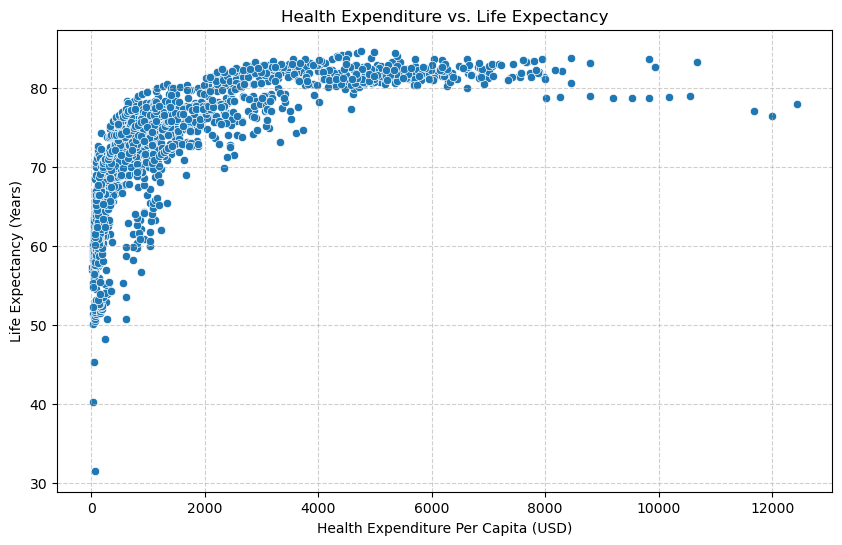

In [192]:
# Health Expenditure vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='health_expenditure', y='life_expectancy', data=merged)
plt.title('Health Expenditure vs. Life Expectancy')
plt.xlabel('Health Expenditure Per Capita (USD)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

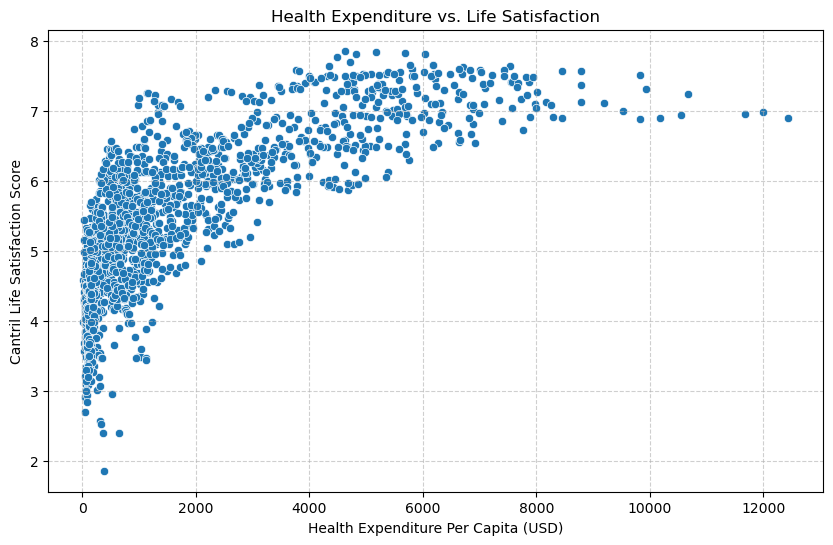

In [193]:
# Health Expenditure vs. Life Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='health_expenditure', y='life_satisfaction', data=merged)
plt.title('Health Expenditure vs. Life Satisfaction')
plt.xlabel('Health Expenditure Per Capita (USD)')
plt.ylabel('Cantril Life Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

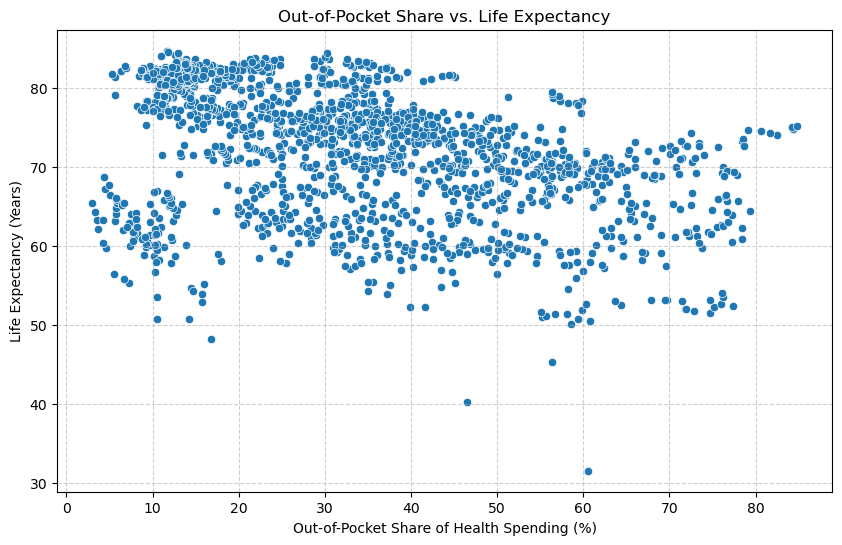

In [194]:
# Out-of-pocket (%) vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='out_of_pocket_share', y='life_expectancy', data=merged)
plt.title('Out-of-Pocket Share vs. Life Expectancy')
plt.xlabel('Out-of-Pocket Share of Health Spending (%)')
plt.ylabel('Life Expectancy (Years)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

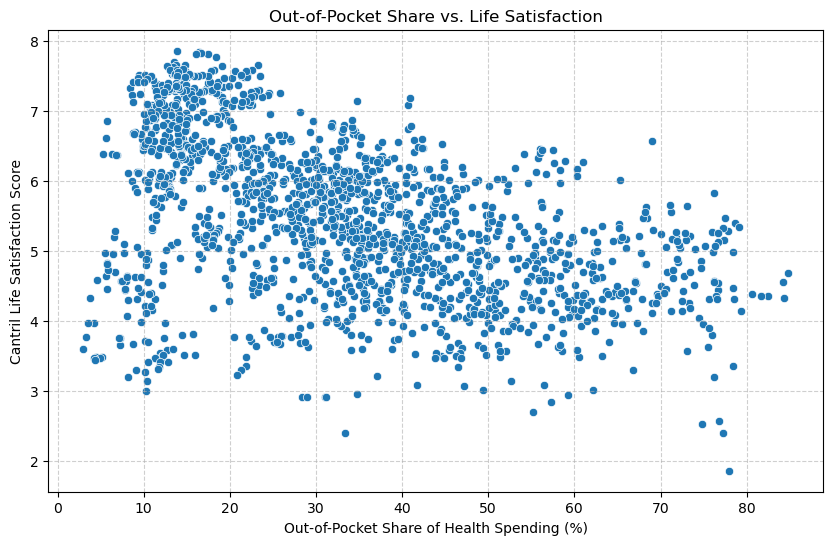

In [195]:
# Out-of-pocket (%) vs Life Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='out_of_pocket_share', y='life_satisfaction', data=merged)
plt.title('Out-of-Pocket Share vs. Life Satisfaction')
plt.xlabel('Out-of-Pocket Share of Health Spending (%)')
plt.ylabel('Cantril Life Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Conclusion

The original hypothesis about "higher healthcare prices reducing well-being" was confirmed, but with an important distinction:
* **Total Health Expenditure** showed a **strong positive association** with well-being.
* The **Out-of-Pocket financial burden** showed a **moderate negative effect**.

This means that high spending countries achieve better health **ONLY when the spending is not primarily carried by individuals**. When healthcare becomes financially burdensome, well-being declines.

## Implication

This suggests that global health funds should be prioritized for low-spending countries, where each dollar has dramatically more impact (due to the non-linear nature of health returns).
